# Machine learning - 2nd practice project 

### Titanic Survived Passengers Project

-- Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [63]:
titanic = pd.read_csv("C:/Users/user/Downloads/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.shape

(891, 12)

In [5]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
#Checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping the column 'Cabin' as there is too many null values..and we do not have a definite value to replace these null values..

In [64]:
titanic.drop('Cabin',axis = 1,inplace = True)

In [11]:
#Again Checking for null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

As age has a lot of null values, we shall replace these null values with the mean of ages..

In [65]:
#Mean of Age Column
print("The mean value of Ages is:", titanic["Age"].mean())

The mean value of Ages is: 29.69911764705882


In [66]:
#Filling null values in Ages with its mean
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

In [67]:
#Again Checking for null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now we shall the drop the 2 null value rows in the 'Embarked' column.. 

In [68]:
titanic.dropna(inplace = True)

In [69]:
#Again Checking for null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

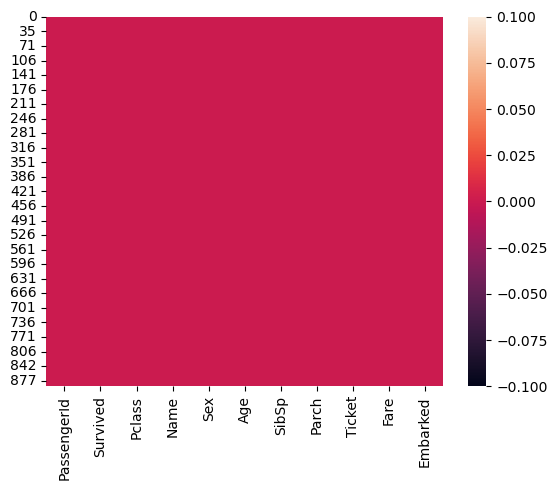

In [31]:
sns.heatmap(titanic.isnull())

In [70]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


The row count of the dataset has been dropped from 891 rows to 889 rows..

In [29]:
#Checking for Duplicates
titanic.duplicated().sum()

0

No duplicate values present in our dataset..

In [30]:
#Checking for dataset info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [32]:
#Checking the number of unique values of each column
titanic.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [40]:
for i in titanic.columns:
    print(titanic[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: PassengerId, Length: 889, dtype: int64


0    549
1    340
Name: Survived, dtype: int64


3    491
1    214
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64


male      577
female    312
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


0

## Univariate Analysis 

In [33]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-- From the numerical data present in the dataset,we can see that:..

  1. Average people's age on the titanic is around 30 years..
  2. Average people's fare on the titanic costs around 32 British pounds..
  3. There might be presence of outliers in the column 'Fare' and it might need some tuning..

As we are predicting only the survival rate of passengers..features like 'Passenger ID','Ticket No' and 'Name' do not play much role in the prediction process..but we shall use it with analysis process before dropping the respective columns..

## Bivariate Analysis

-- Now we shall see how the variables(features) are related to each other and what can we derive from them..

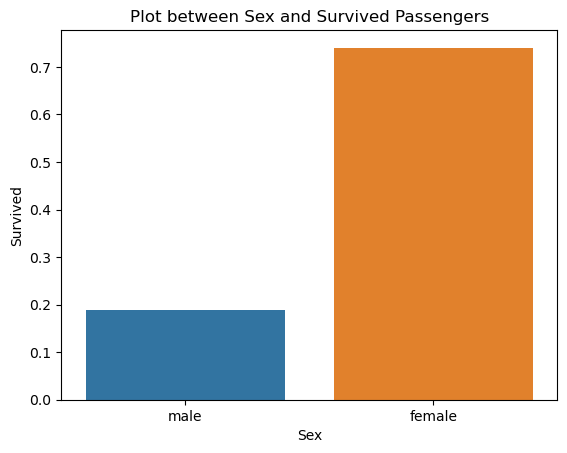

In [34]:
# Applying scatterplot,barplot so that the linear relationship between the target and independent variable becomes evident..
# 1.) Sex and Survived
sns.barplot(x='Sex',y='Survived',data=titanic,ci=False)
plt.title("Plot between Sex and Survived Passengers")
plt.show()

-- As we can see, the number of female passengers survived is obviously way more than that of the number of male passengers...

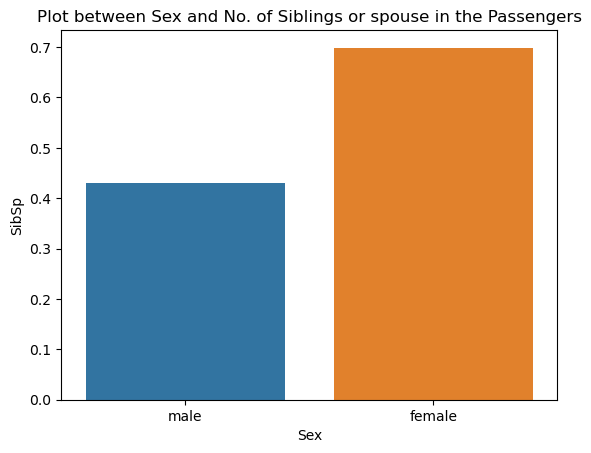

In [48]:
#1.) Sex and Sibsp
sns.barplot(x='Sex',y='SibSp',data=titanic,ci=False)
plt.title("Plot between Sex and No. of Siblings or spouse in the Passengers")
plt.show()

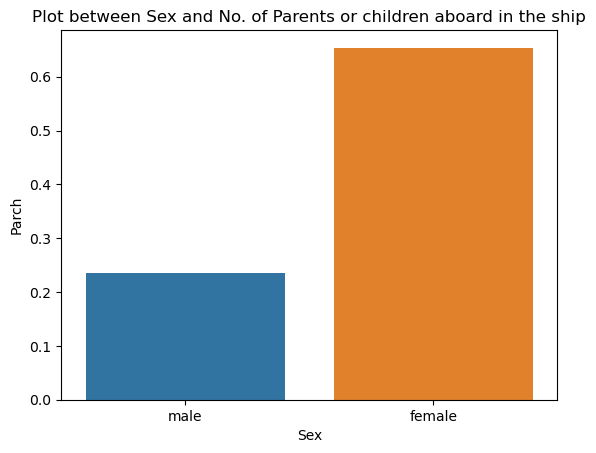

In [49]:
sns.barplot(x='Sex',y='Parch',data=titanic,ci=False)
plt.title("Plot between Sex and No. of Parents or children aboard in the ship")
plt.show()

-- We can say that, Most of the female aboard in the ship are mostly children..

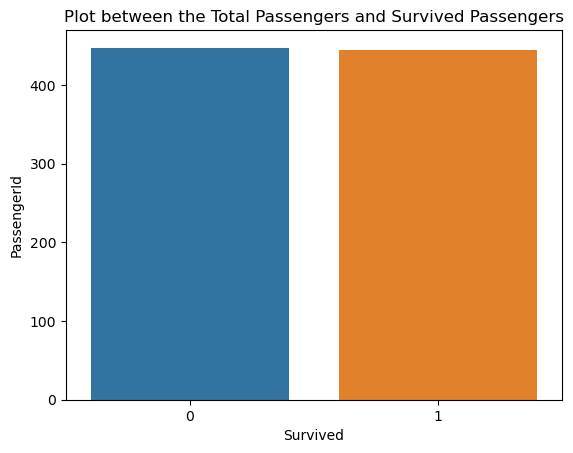

In [39]:
# 2.) Passenger ID and Survived
sns.barplot(x='Survived',y='PassengerId',data=titanic,ci=False)
plt.title("Plot between the Total Passengers and Survived Passengers")
plt.show()

-- As we can see, from the total passengers the count of passengers who did not survive is slightly more than that of the count of passengers who survived the crash...

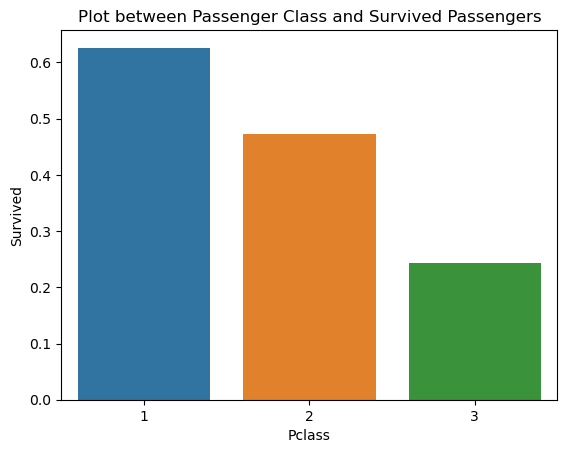

In [43]:
# 3.) Passenger Class and Survived
sns.barplot(x='Pclass',y='Survived',data=titanic,ci=False)
plt.title("Plot between Passenger Class and Survived Passengers")
plt.show()

-- From the above plot, we see that the 1st class Passenger have more survival rate than 2nd and 3rd class Passengers..

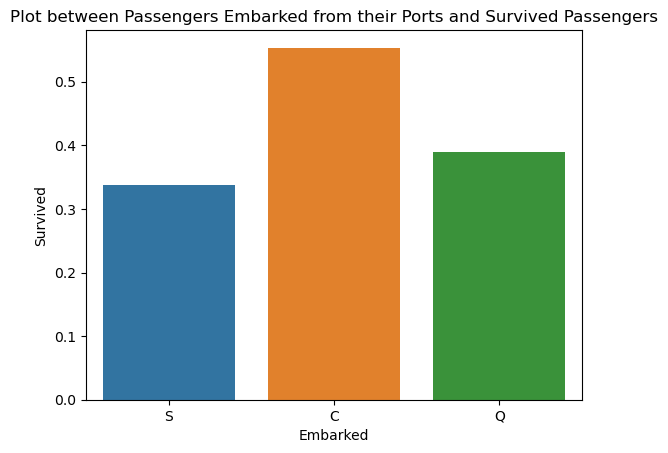

In [44]:
# 3.) Embarked and Survived
sns.barplot(x='Embarked',y='Survived',data=titanic,ci=False)
plt.title("Plot between Passengers Embarked from their Ports and Survived Passengers")
plt.show()

-- From the above plot, we see that the Passengers Embarked from Cherbourg port have more survival rate than Passengers Embarked from Queenstown and Southampton ports..

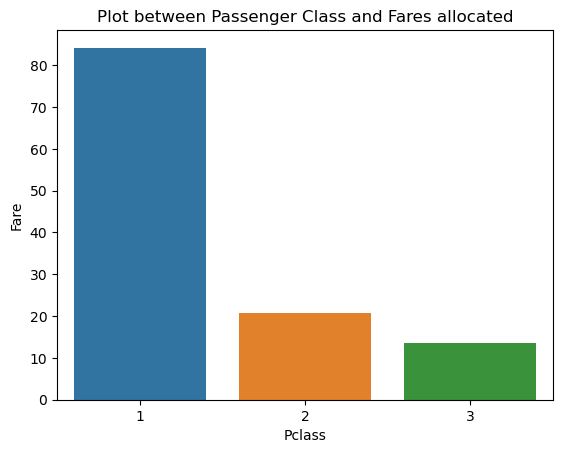

In [71]:
# 3.) Pclass and Fares
sns.barplot(x='Pclass',y='Fare',data=titanic,ci=False)
plt.title("Plot between Passenger Class and Fares allocated")
plt.show()

-- From the above plot, no surprises here but the fare price for the 1st class people on board is way higher than the fare price for the 2nd and 3rd class.. 

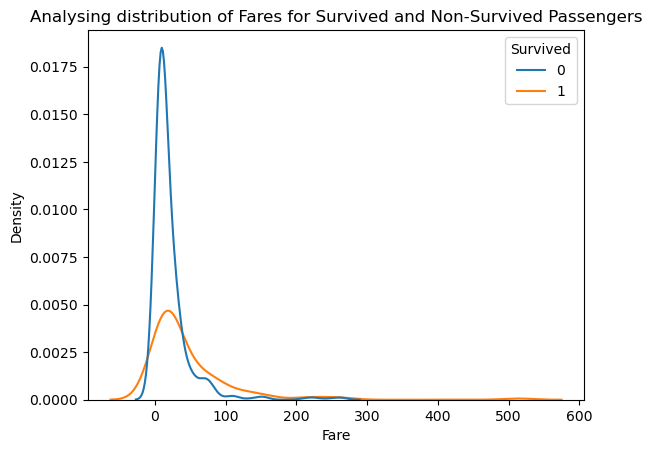

In [45]:
sns.kdeplot(x="Fare",data=titanic,hue='Survived')
plt.title('Analysing distribution of Fares for Survived and Non-Survived Passengers')
plt.show()

From the above distribution plot, we can say that the survival rate of the passengers with high fares is drastically more than that of the survival rate of the passengers with low fares...

## Multivariate Analysis 

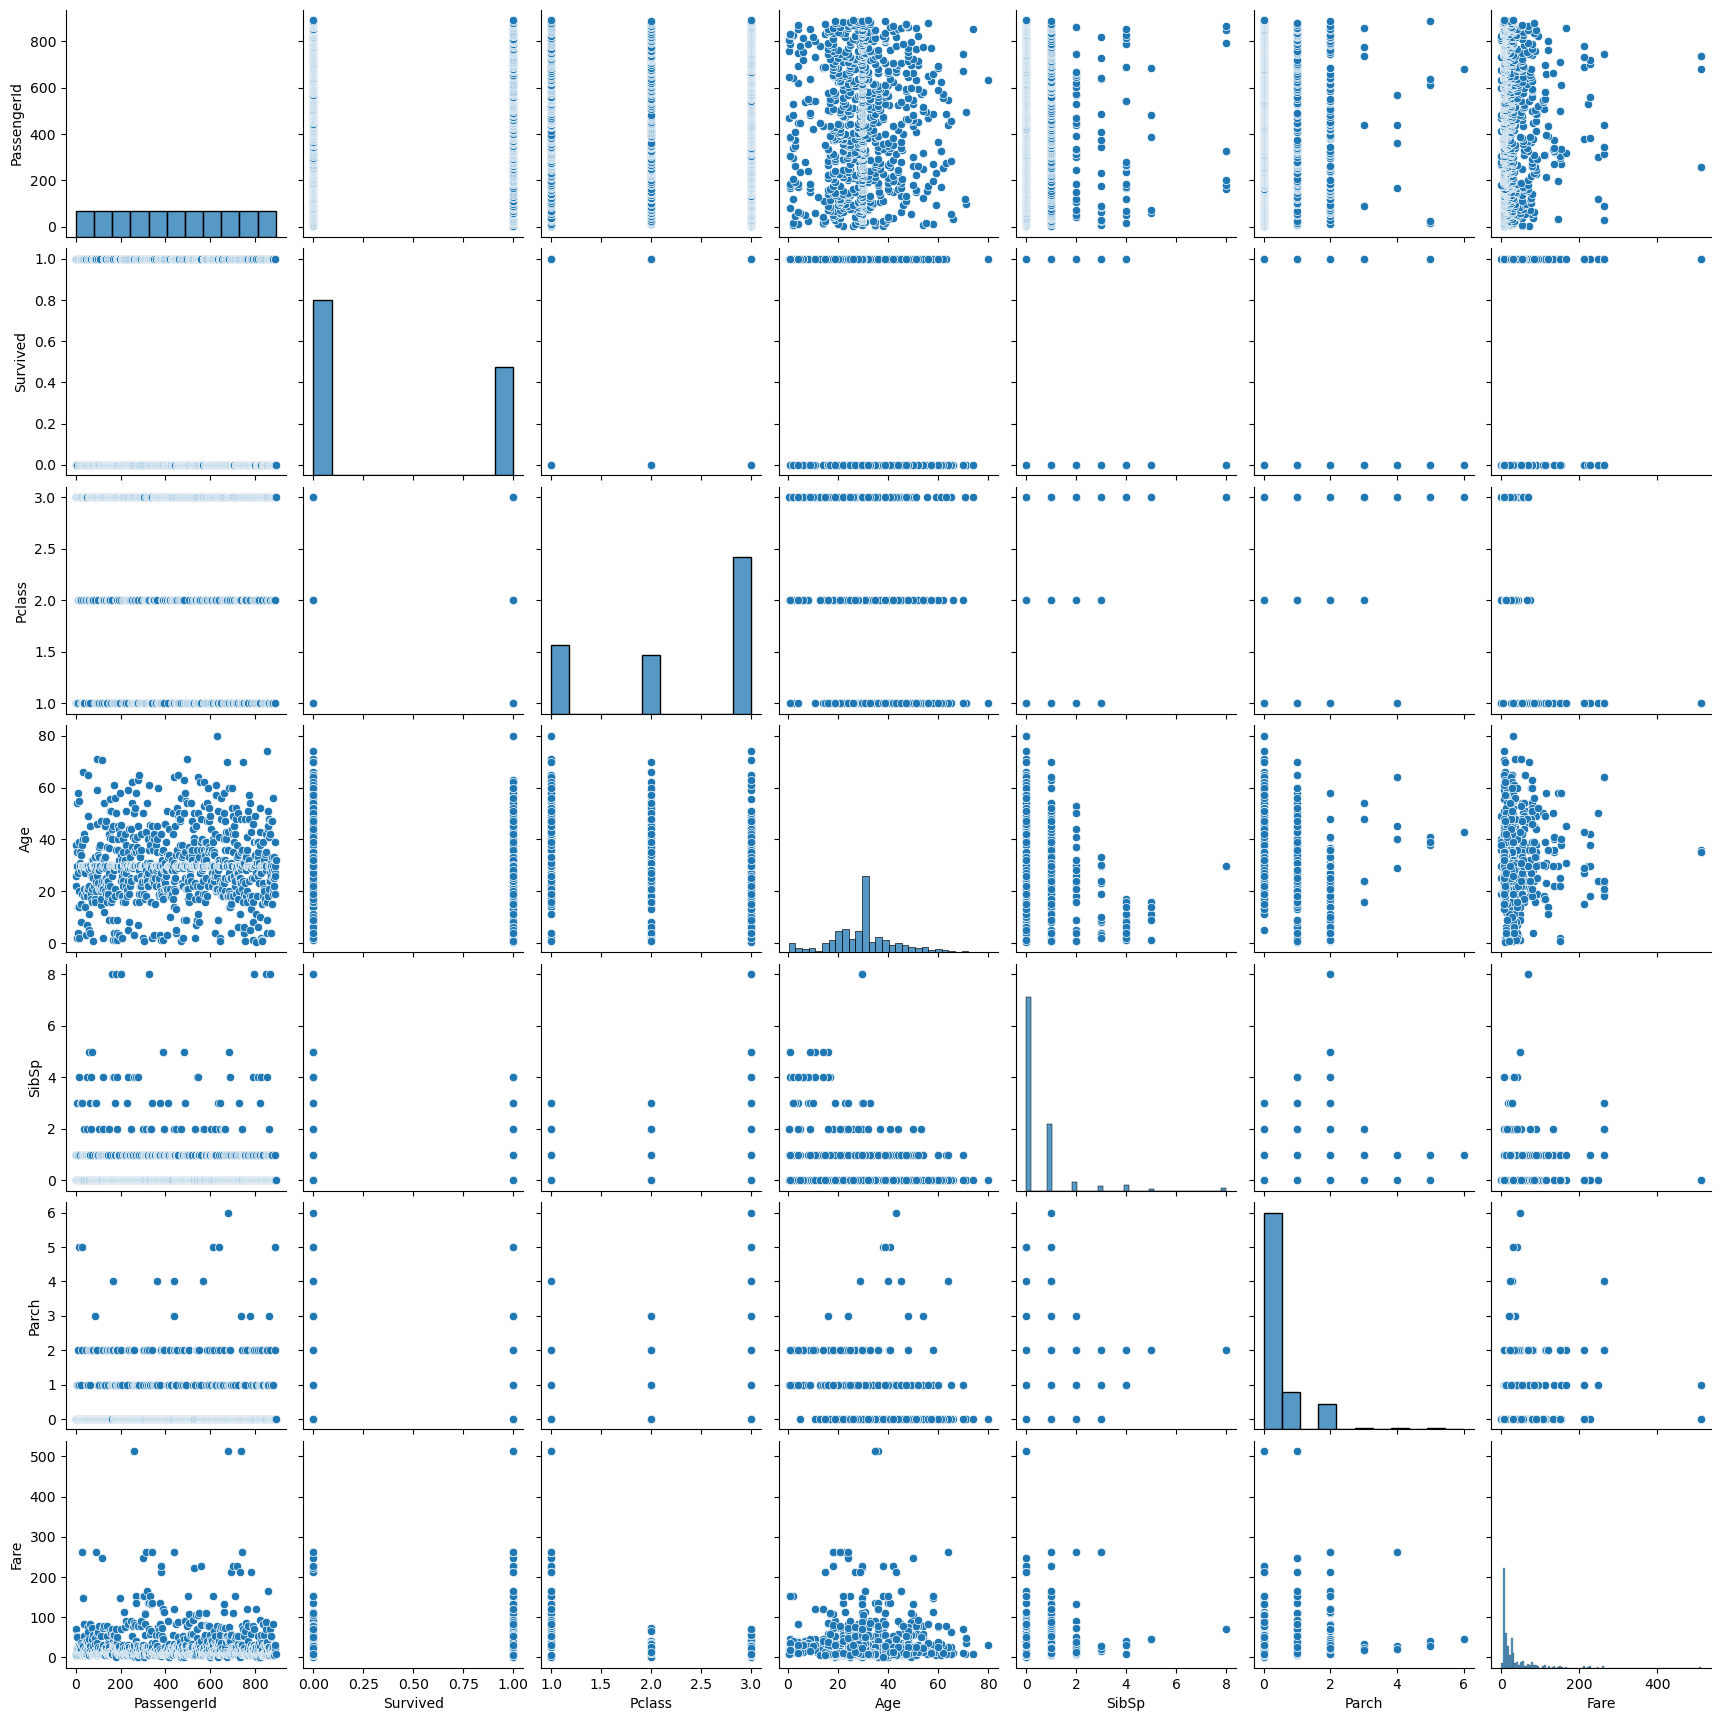

In [51]:
sns.pairplot(titanic)

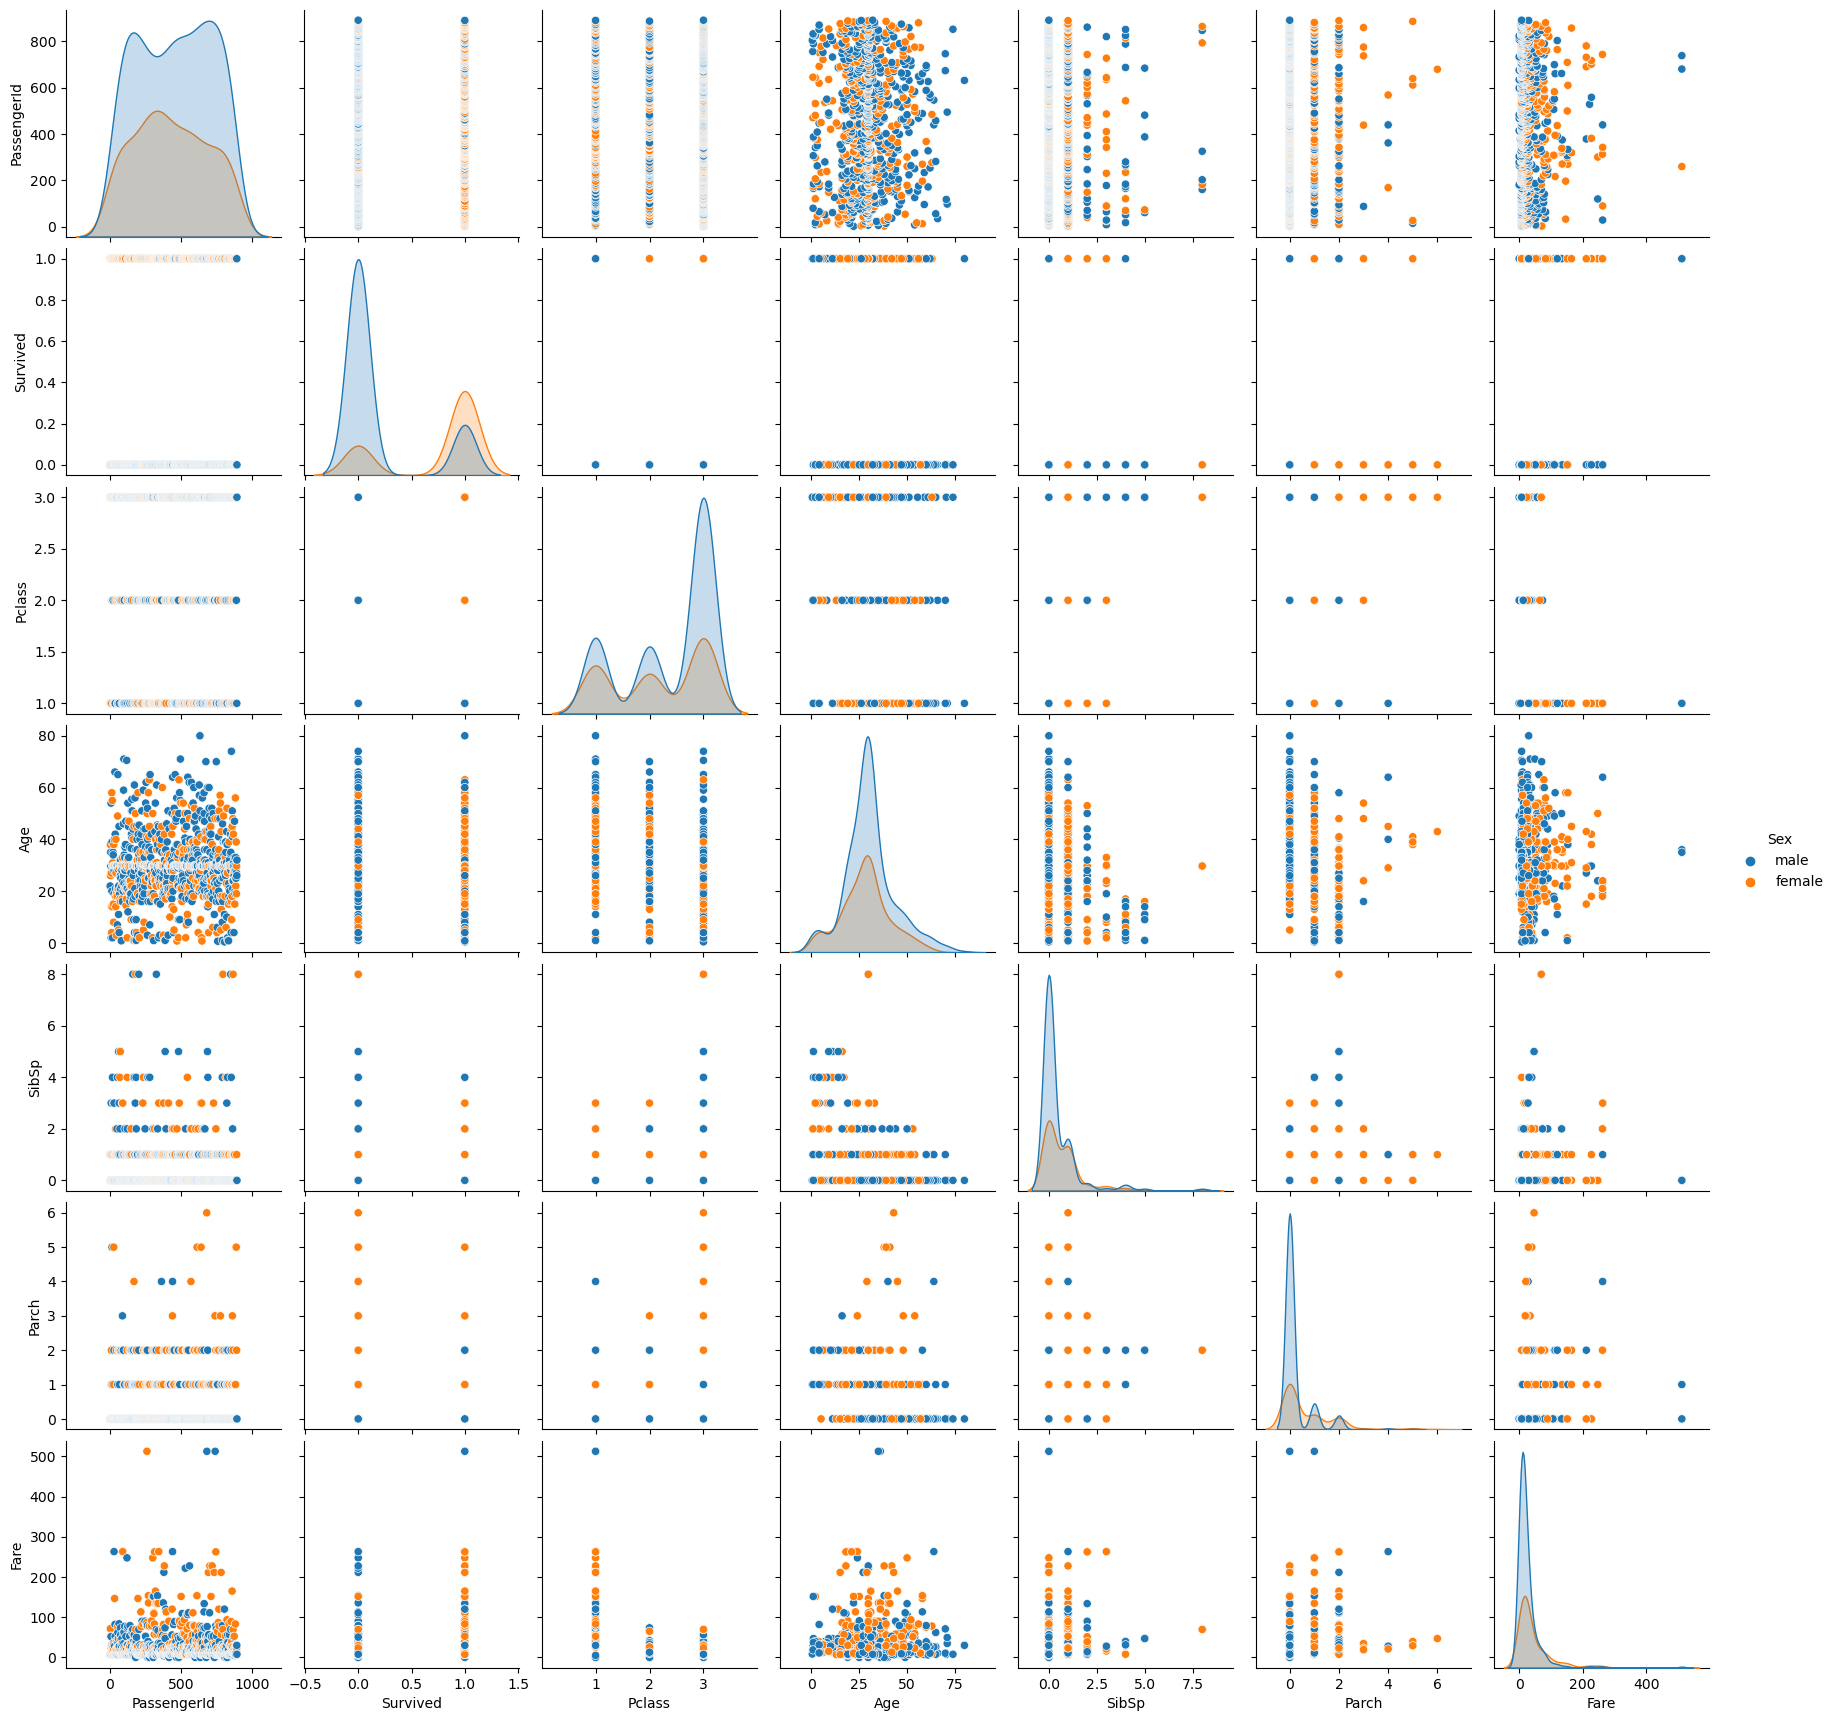

In [52]:
sns.pairplot(titanic,hue = 'Sex')

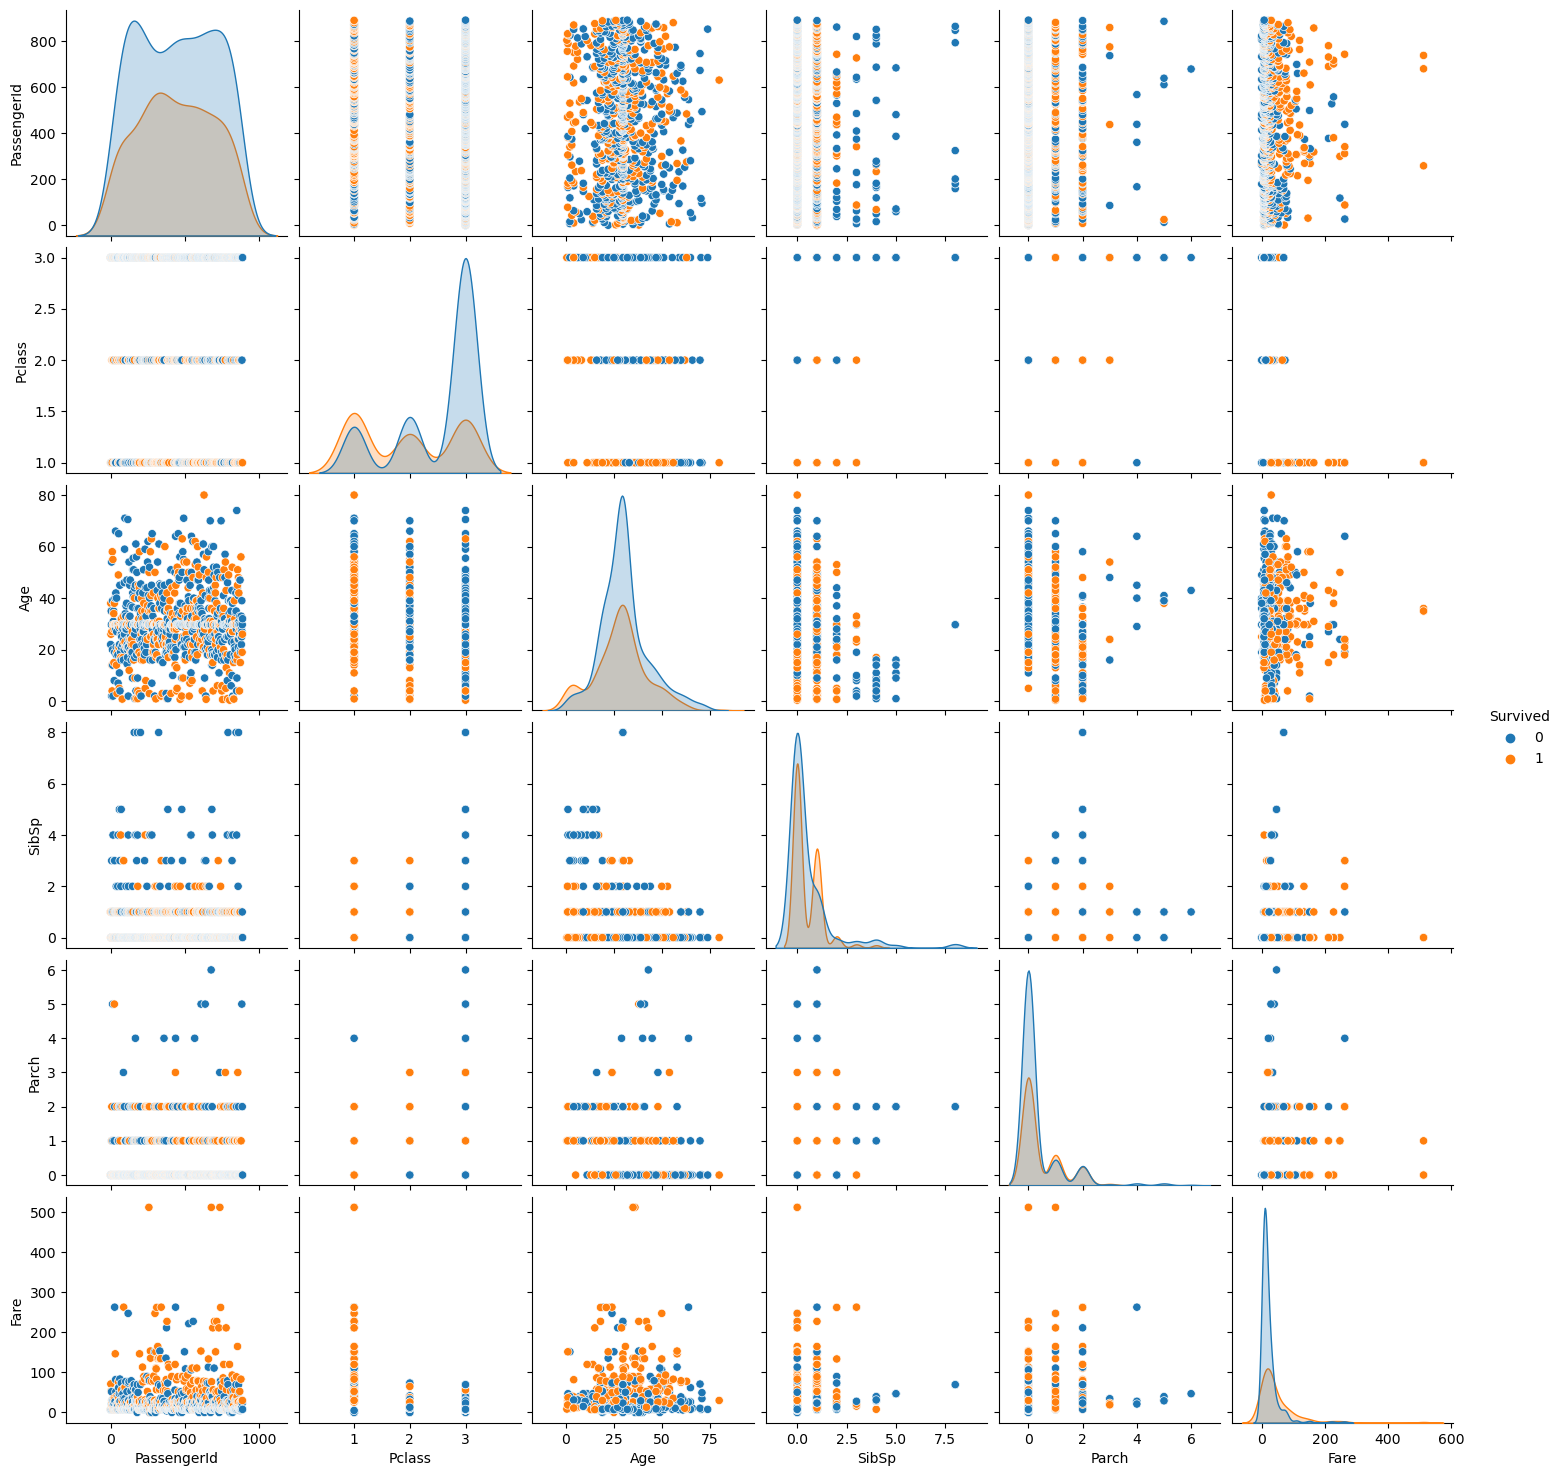

In [53]:
sns.pairplot(titanic,hue = 'Survived')

## Feature Selection and Feature Engineering 

PassengerId       Axes(0.125,0.53;0.110714x0.35)
Survived       Axes(0.257857,0.53;0.110714x0.35)
Pclass         Axes(0.390714,0.53;0.110714x0.35)
Age            Axes(0.523571,0.53;0.110714x0.35)
SibSp          Axes(0.656429,0.53;0.110714x0.35)
Parch          Axes(0.789286,0.53;0.110714x0.35)
Fare              Axes(0.125,0.11;0.110714x0.35)
dtype: object

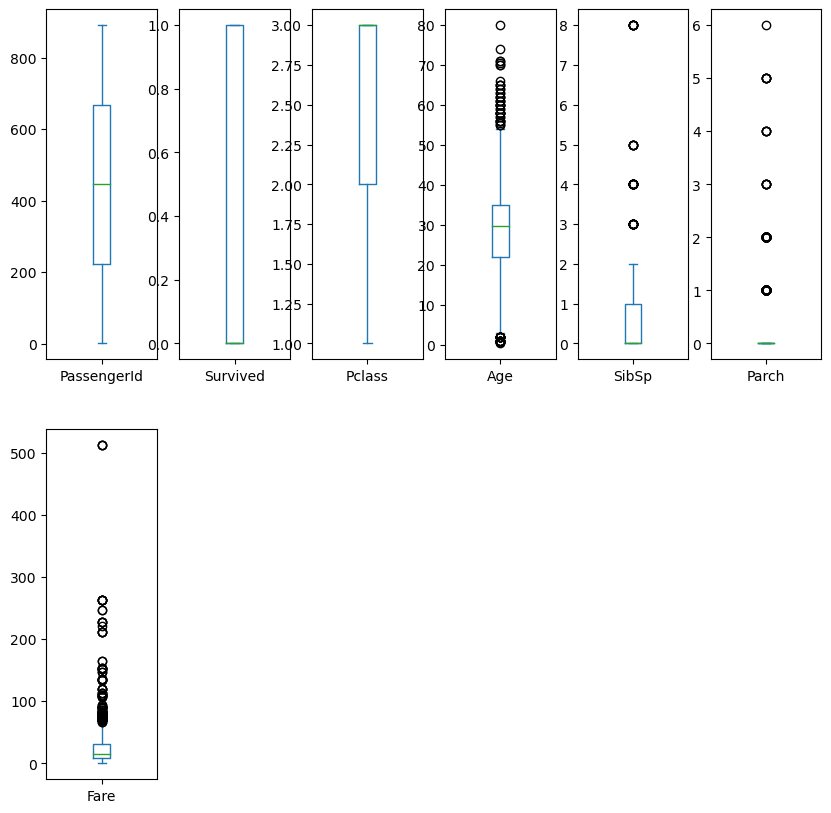

In [54]:
#Checking for outliers using boxplots and removing them if necessary
titanic.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

-- As we can see there are too many outliers, atleast one in every column.In order to remove these outliers,we shall the z-score method.. If z-score > 3, they are considered as outliers and we can remove them.

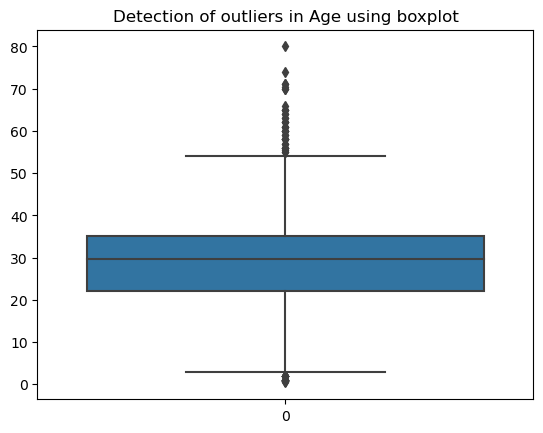

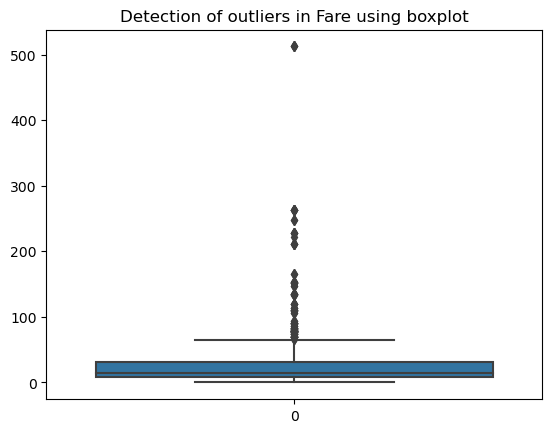

In [57]:
numeric_col = ['Age','Fare']
for col in numeric_col:
    sns.boxplot(titanic[col])
    plt.title('Detection of outliers in {} using boxplot'.format(col))
    plt.show()

1. The boxplot of 'Age' column showed that there are some outliers,but we will not remove them as the data is realistic (i.e 
   a person of age 80 can be on the ship)..
3. The boxplot of 'Fare' column too shows a lot of outliers,but again the variation of seat fares according to 3 different classes may range from a very high value to the lowest..so no need to remove the outliers(can refer to the barplot between Fare and Passenger class plotted above)...

IMP--

-- As mentioned in the earlier comment that as we are predicting only the survival rate of passengers..features like 'Passenger Id', 'Ticket' and 'Name' does not play much role in the prediction process..and therefore as a process of feature engineering we shall be dropping the above mentioned columns and move ahead with correlation analysis, data preprocessing etc...

In [72]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [73]:
#Dropping the 'Passengerid' column..
titanic.drop('PassengerId',axis = 1,inplace = True)

In [74]:
#Dropping the 'Name' column..
titanic.drop('Name',axis = 1,inplace = True)

In [75]:
#Dropping the 'Ticket' column
titanic.drop('Ticket',axis = 1,inplace = True)

In [76]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Now Label Encoding the categorical variables to numerical..using LabelEncoder..

In [78]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cat_col = ['Sex','Embarked']
for i in cat_col:
    titanic[i] = LabelEncoder().fit_transform(titanic[i])

In [79]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [80]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.6 KB


### Correlation Analysis 

In [81]:
titanic_cor = titanic.corr()
titanic_cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


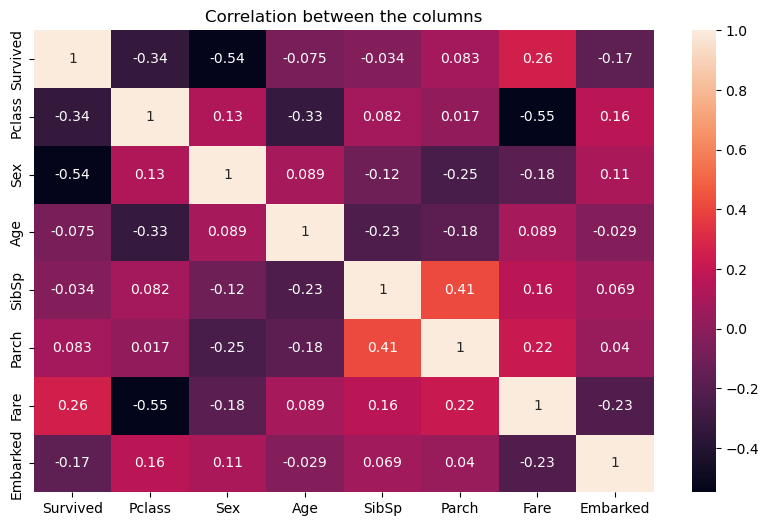

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- From the above heatmap, we can see that there is no much strong positive correlation between any of the features with the target variable..However, there is moderate correlation among them.. And also there is no sign of multicollinearity too, so that's good...

-- The feature 'Fare' is the only column that has a slight positive correlation with the target feature..

-- Now we shall move onto data pre-processing..

## Data Preprocessing 

In [83]:
#Splitting the dataframe into feature and target variables
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [84]:
y = titanic['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [85]:
x = titanic.drop("Survived",axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


Now, As the data contains variables which have different scales we are standardizing them..

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [87]:
X

,0,1,2,3,4,5,6
0,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,0.586840
1,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,-1.939555
2,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,0.586840
3,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,0.586840
4,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,0.586840
...,...,...,...,...,...,...,...
884,-0.373501,0.735342,-0.204724,-0.475199,-0.474326,-0.384475,0.586840
885,-1.572211,-1.359911,-0.821957,-0.475199,-0.474326,-0.042213,0.586840
886,0.825209,-1.359911,0.003524,0.431350,2.006119,-0.174084,0.586840
887,-1.572211,0.735342,-0.281878,-0.475199,-0.474326,-0.042213,-1.939555


In [88]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [89]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (622, 7)
y_train  (622,)
X_test  (267, 7)
y_test  (267,)


## Model Training 

-- As this is a Classification problem, we shall predict values using all the models which fall under classification... such as Logistic Regression,Decision Trees,Random Forest etc..

#### Logistic Regression 

In [90]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 81.27%


In [92]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       169
           1       0.79      0.67      0.73        98

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [93]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[151  18]
 [ 32  66]]
TN:  151
FN:  32
TP:  66
FP:  18


#### Decision Tree Classifier Model 

In [94]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [95]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 78.65%


In [96]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       169
           1       0.75      0.63      0.69        98

    accuracy                           0.79       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.79      0.78       267



In [97]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[148  21]
 [ 36  62]]
TN:  148
FN:  36
TP:  62
FP:  21


#### Random Forest Classifier Model 

In [98]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [99]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 79.78%


In [100]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       169
           1       0.76      0.65      0.70        98

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.80      0.80      0.79       267



In [101]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[149  20]
 [ 34  64]]
TN:  149
FN:  34
TP:  64
FP:  20


#### Naive Bayes Classifier Model 

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 81.65%


In [104]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       169
           1       0.76      0.72      0.74        98

    accuracy                           0.82       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.82      0.82       267



In [105]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[147  22]
 [ 27  71]]
TN:  147
FN:  27
TP:  71
FP:  22


#### Support Vector Classifier Model 

In [106]:
#importing necessary libraries
from sklearn.svm import SVC

In [107]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 80.90%


In [108]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       169
           1       0.81      0.63      0.71        98

    accuracy                           0.81       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267



In [109]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[154  15]
 [ 36  62]]
TN:  154
FN:  36
TP:  62
FP:  15


#### K- nearest neighbor Classifier Model

In [110]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 80.15%


In [112]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       169
           1       0.78      0.64      0.70        98

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [113]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[151  18]
 [ 35  63]]
TN:  151
FN:  35
TP:  63
FP:  18


Conclusion:
 
 -- From all the above classification models tested, the one with the highest accuracy score is the Naive Bayes Classifier Model with an accuracy score of 81.65%..overall a really good accuracy score..which also works really well for our prediction purposes..

-- Now we shall confirm our model by using cross-validation techniques..to know which model is best suitable for our prediction
and also move on with hyper parameter tuning of our confirmed model..

### Cross Validation Score

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
#Logistic Regression
score = cross_val_score(logreg,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,logreg_pred) - score.mean())

[0.7752809  0.78651685 0.78089888 0.76404494 0.81920904]
0.7851901225163461
Difference between Accuracy score and cross validation score is -  0.02754395988065761


In [116]:
#Decision Tree Classifier 
score = cross_val_score(dtree,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,dtree_pred) - score.mean())

[0.74157303 0.76404494 0.80337079 0.74719101 0.80225989]
0.7716879324573098
Difference between Accuracy score and cross validation score is -  0.014828921475274481


In [117]:
#Random Forest Classifier
score = cross_val_score(r_f,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.79213483 0.81460674 0.84269663 0.76404494 0.84745763]
0.812188154637212
Difference between Accuracy score and cross validation score is -  -0.01443534564844795


In [119]:
#Naive Bayes Classifier
score = cross_val_score(nb,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,nb_pred) - score.mean())

[0.76966292 0.79213483 0.78651685 0.80337079 0.80225989]
0.7907890560528154
Difference between Accuracy score and cross validation score is -  0.025690344696248313


In [121]:
#Support Vector Classifier 
score = cross_val_score(svc,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,svc_pred) - score.mean())

[0.83146067 0.82022472 0.81460674 0.80337079 0.86440678]
0.8268139402018664
Difference between Accuracy score and cross validation score is -  -0.017825176156922584


In [122]:
#K-Nearest Neighbour Classifier
score = cross_val_score(knn,X,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,knn_pred) - score.mean())

[0.78089888 0.76966292 0.82022472 0.81460674 0.82485876]
0.8020504030978227
Difference between Accuracy score and cross validation score is -  -0.000552275756998788


-- As the difference between the accuracy score and cross validation score is less in the Naive-Bayes Classifier model..
  We shall be choosing Naive-Bayes as our best and final model..

### Plotting ROC-AUC curve for the final model 

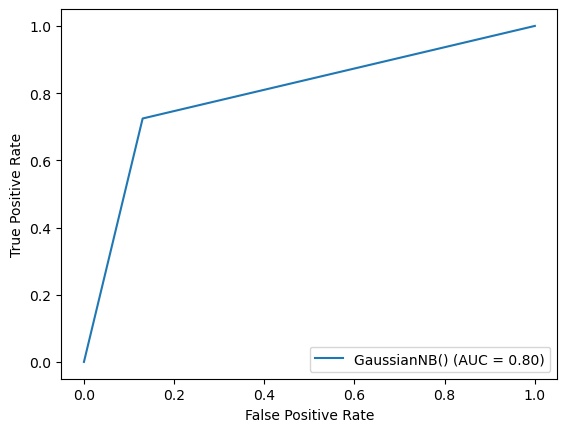

In [124]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,nb_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=nb)
display.plot()

-- As we can see from the above AUC-ROC curve, The AUC value of the Final Model is 0.80 which is nearly close to 1.. which means the value we got is very good..as this value says us that the differenciation of classes from this Final Model will be good for our prediction..

## Saving the Model 

In [126]:
import joblib
joblib.dump(nb,"Titanic_survival_project.pkl")

['Titanic_survival_project.pkl']

In [130]:
model = joblib.load("Titanic_survival_project.pkl")

In [131]:
#Predicted Values
prediction = nb_pred
prediction

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [135]:
#Original Values
a = np.array(y_test)
a

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [132]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
262,1,1
263,0,0
264,0,0
265,0,1
